## LECTURE ET PREPARATION JEU DE DONNEE

In [1]:
import os
import shutil
import random

# Chemins des répertoires source et destination
source_dir = 'archive/animal/'
train_dir = 'archive/train/'
validation_dir = 'archive/validation/'


# Fraction des données à utiliser pour la validation et le test
validation_split = 0.15# 20% des données pour la validation

# Créer les répertoires train, validation, test si nécessaire
os.makedirs(train_dir + 'cat', exist_ok=True)
os.makedirs(train_dir + 'dog', exist_ok=True)
os.makedirs(validation_dir + 'cat', exist_ok=True)
os.makedirs(validation_dir + 'dog', exist_ok=True)

# Fonction pour répartir les images entre train, validation et test
def split_data(source, train_dest, validation_dest, validation_split):
    all_files = os.listdir(source)
    random.shuffle(all_files)  # Mélanger les fichiers pour une répartition aléatoire
    
    # Calculer les indices de séparation
    train_split_idx = int(len(all_files) * (1 - validation_split ))

    # Répartir les fichiers
    train_files = all_files[:train_split_idx]
    validation_files = all_files[train_split_idx:]

    # Copier les fichiers dans les répertoires de destination
    for file in train_files:
        shutil.copy(os.path.join(source, file), os.path.join(train_dest, file))
    for file in validation_files:
        shutil.copy(os.path.join(source, file), os.path.join(validation_dest, file))

# Répartir les images de chat
split_data(source_dir + 'cat', train_dir + 'cat', validation_dir + 'cat', validation_split)

# Répartir les images de chien
split_data(source_dir + 'dog', train_dir + 'dog', validation_dir + 'dog',  validation_split)

print("Séparation des données terminée.")



FileNotFoundError: [Errno 2] No such file or directory: 'archive/animal/cat'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Générateur d'images pour l'entraînement avec augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalisation des images
    rotation_range=40,           # Rotation aléatoire des images
    width_shift_range=0.2,       # Décalage horizontal
    height_shift_range=0.2,      # Décalage vertical
    shear_range=0.2,             # Déformation (shear)
    zoom_range=0.2,              # Zoom aléatoire
    horizontal_flip=True,        # Retournement horizontal
    fill_mode='nearest'          # Mode de remplissage
)

# Générateur d'images pour la validation (sans augmentation)
validation_datagen = ImageDataGenerator(rescale=1./255)


# Charger les images d'entraînement
train_generator = train_datagen.flow_from_directory(
    'archive/train/',
    target_size=(128, 128),      # Redimensionner les images
    batch_size=64,               # Taille des lots
    class_mode='binary'          # Classification binaire (chien ou chat)
)

# Charger les images de validation
validation_generator = validation_datagen.flow_from_directory(
    'archive/validation/',
    target_size=(128, 128),
    batch_size=64,
    class_mode='binary'
)



Found 850 images belonging to 2 classes.
Found 150 images belonging to 2 classes.


In [ ]:
!pip install pillow


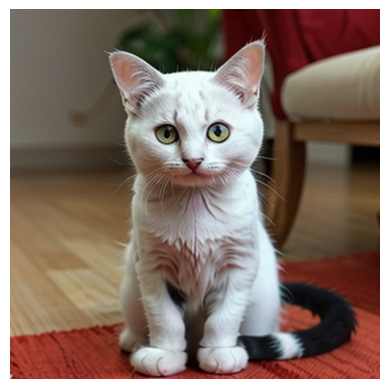

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Chemin vers le répertoire d'entraînement
validation_cat_dir = 'archive/validation/cat/'  # Chemin vers ton dossier contenant les images des chats

# Lister les fichiers dans le dossier cat
cat_images = os.listdir(validation_cat_dir)

# Lire la première image
first_image_path = os.path.join(validation_cat_dir, cat_images[0])

# Ouvrir l'image avec PIL
img = Image.open(first_image_path)

# Afficher l'image avec matplotlib
plt.imshow(img)
plt.axis('off')  # Masquer les axes
plt.show()


In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation="relu",
                  input_shape=[128, 128, 3]),
    layers.MaxPool2D(pool_size=2),

    layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
    layers.MaxPool2D(pool_size=2),

    layers.Conv2D(filters=128, kernel_size=3, activation="relu"), 
    layers.MaxPool2D(pool_size=2),

    # Classifier Head
    layers.Flatten(),
    layers.Dense(units=20, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])

model.summary()


C:\Users\ouaha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 20)                  │         501,780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 595,049 (2.27 MB)

 Trainable params: 595,049 (2.27 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
import tensorflow

model.compile(
    optimizer=tensorflow.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
)

Epoch 1/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - binary_accuracy: 0.5762 - loss: 0.6837 - val_binary_accuracy: 0.6733 - val_loss: 0.6752
Epoch 2/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - binary_accuracy: 0.6167 - loss: 0.6819 - val_binary_accuracy: 0.6400 - val_loss: 0.6707
Epoch 3/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - binary_accuracy: 0.6448 - loss: 0.6754 - val_binary_accuracy: 0.6867 - val_loss: 0.6592
Epoch 4/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - binary_accuracy: 0.5993 - loss: 0.6739 - val_binary_accuracy: 0.7267 - val_loss: 0.6471
Epoch 5/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - binary_accuracy: 0.6313 - loss: 0.6673 - val_binary_accuracy: 0.7333 - val_loss: 0.6346
Epoch 6/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - binary_accuracy: 0.6095 - loss: 0.6580 - val_binary_accuracy: 0.6267 - val_loss: 0.6430
Epoch 7/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - binary_accuracy: 0.6572 - loss: 0.6384 - val_binary_accuracy: 0.7133 - val_loss: 0.6093
Epoch 8/15
14/14 ━━━

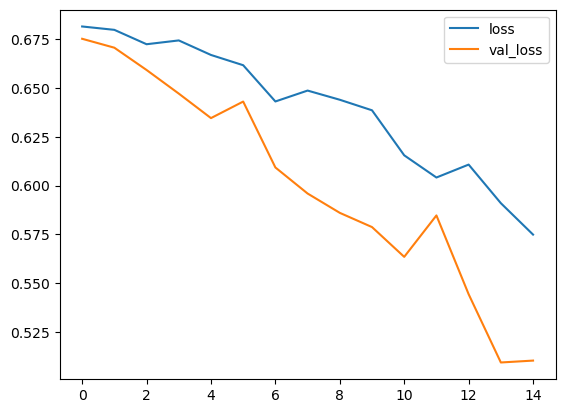

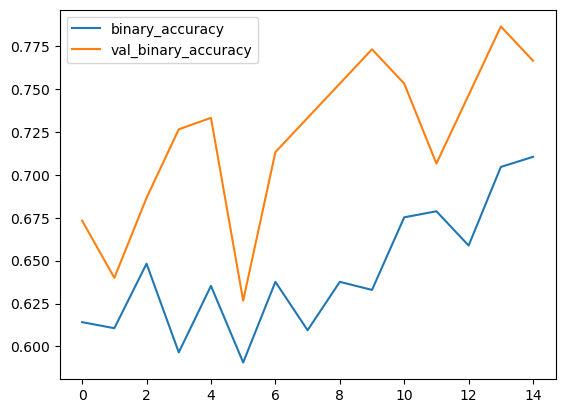

In [11]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();


## CNN

In [ ]:
# from tensorflow.keras import layers, models
# from tensorflow.keras.layers import BatchNormalization, Dropout, Dense, Flatten
# from tensorflow.keras.optimizers import Adam

# model = keras.Sequential()

# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
# model.add(BatchNormalization())
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))


# # Aplatir les cartes de caractéristiques en un vecteur 1D
# model.add(layers.Flatten())


# model.add(BatchNormalization())
# model.add(Dropout(0.25))

# # Dernière couche de sortie (1 neurone avec sigmoïde pour classification binaire)
# model.add(layers.Dense(1, activation='sigmoid'))

# # Compilation du modèle
# model.compile(
#     loss='binary_crossentropy',   # Perte pour la classification binaire
#     optimizer='adam',             # Optimiseur Adam
#     metrics=['accuracy']          # Suivi de la précision
# )

# # Afficher le résumé du modèle
# # model.summary()



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',          # Surveiller la perte en validation
    patience=5,                  # Nombre d'époques sans amélioration avant d'arrêter l'entraînement
    restore_best_weights=True    # Restaurer les poids du modèle ayant la meilleure validation
)


# Entraîner le modèle avec validation
history = model.fit(
    train_generator,
    epochs=35,  # Nombre d'époques
    validation_data=validation_generator,  # Validation
    callbacks=[early_stopping]  # Si vous utilisez un callback, par exemple EarlyStopping
)


# Évaluer le modèle sur les données de test
test_loss, test_acc = model.evaluate(test_generator)
print(f'\nPrécision sur le jeu de test: {test_acc:.4f}')



In [ ]:
# Visualiser l'historique de l'entraînement
plt.plot(history.history['accuracy'], label='Précision en entraînement')
plt.plot(history.history['val_accuracy'], label='Précision en validation')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Visualiser la perte au fil des époques
plt.plot(history.history['loss'], label='Perte en entraînement')
plt.plot(history.history['val_loss'], label='Perte en validation')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend(loc='upper right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


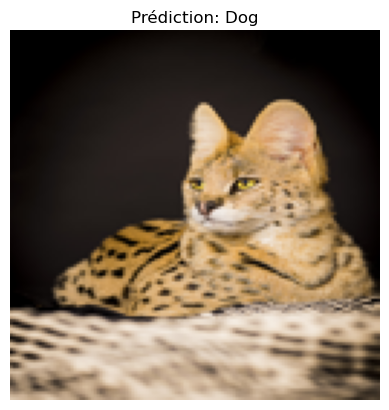

20A6803_WEB.jpg: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


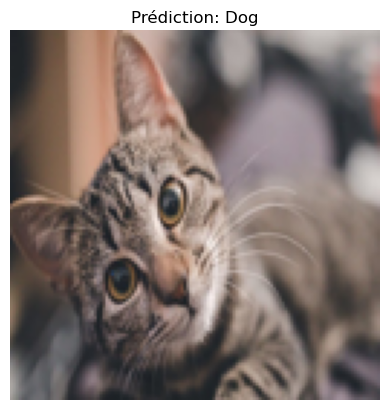

chat-jaloux-e1574672723199@2x.jpg: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


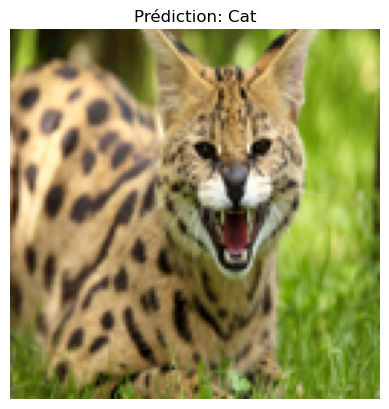

chat-serval-agressif.jpg: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


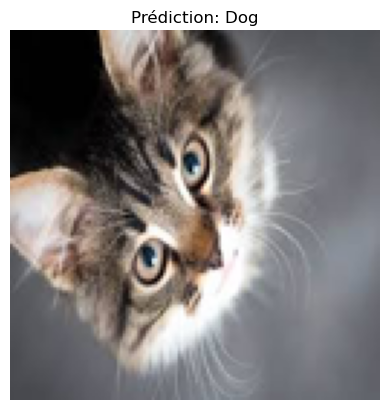

chat.jpeg: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


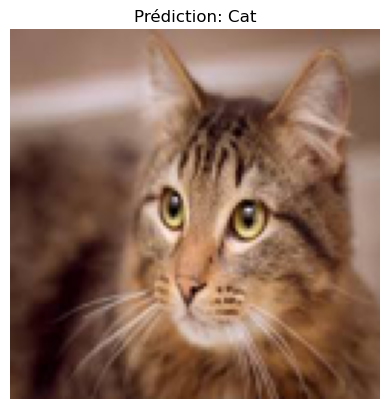

chat1.jpeg: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


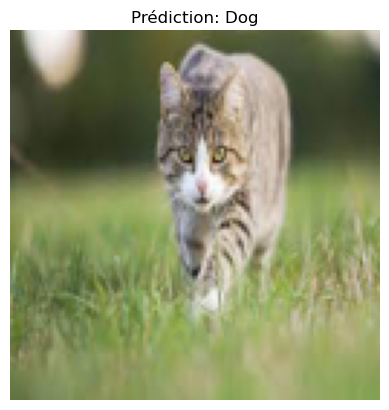

chat2.jpeg: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


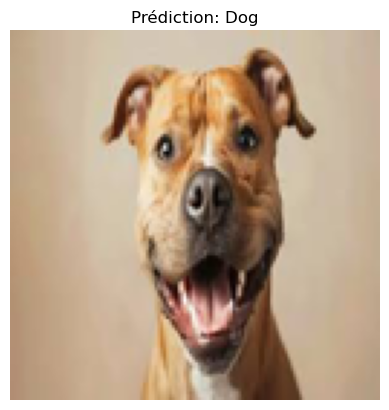

chien.jpeg: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


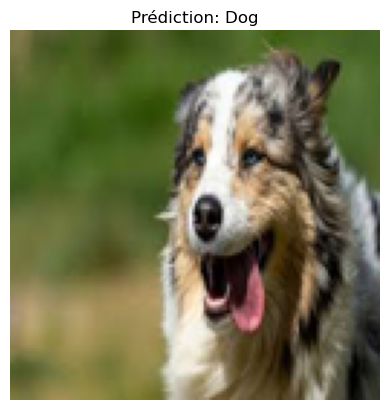

chien2.jpeg: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


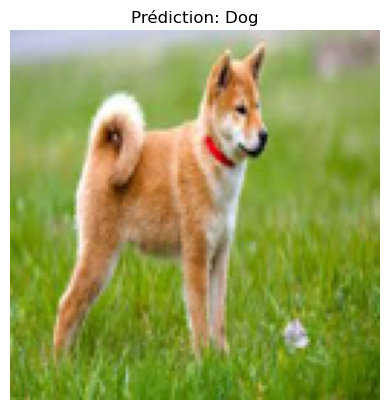

chien3.jpeg: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


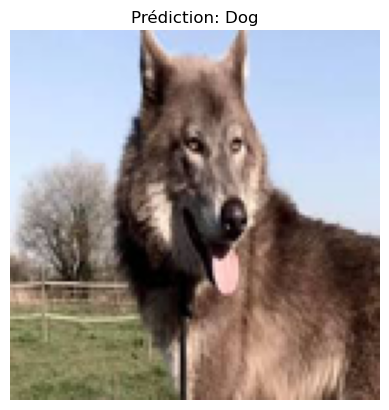

images.jpeg: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


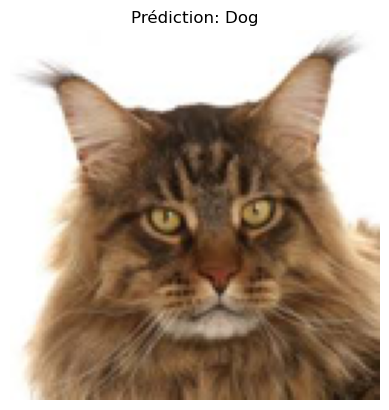

menkoune.jpeg: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


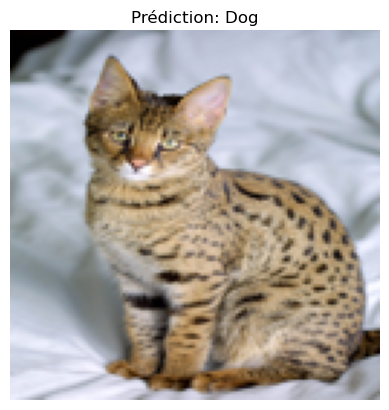

Savannah_Cat_portrait.jpg: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


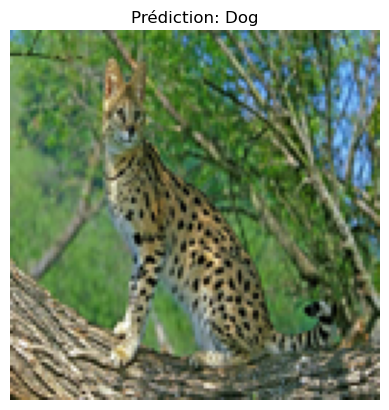

Serval-chat-savannah.jpg: Dog


In [12]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

# Chemin vers le dossier contenant les images
image_dir = "C:/Users/ouaha/OneDrive/Bureau/projet_R.I/test1"  # Remplace par le chemin vers ton dossier d'images
############normaliser les données############
# Lister toutes les images dans le dossier (filtrer les fichiers image par extension)
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Assure-toi qu'il y a des images dans le dossier
if len(image_files) == 0:
    print("Aucune image trouvée dans le dossier.")
else:
    for img_file in image_files:
        # Charger le chemin complet de l'image
        img_path = os.path.join(image_dir, img_file)
        
        # Charger l'image avec PIL et la redimensionner à (150, 150)
        img = Image.open(img_path)
        img = img.resize((128, 128))

        # Prétraiter l'image (convertir en tableau numpy et normaliser)
        img_array = np.array(img)  # Convertir l'image en tableau numpy
        img_array = img_array / 255.0  # Normaliser les pixels (0-1)
        img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension (batch size de 1)

        # Prédire avec le modèle
        prediction = model.predict(img_array)

        # Interpréter la prédiction
        if prediction[0] > 0.5:
            result = "Dog"
        else:
            result = "Cat"

        # Afficher l'image avec le résultat
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Prédiction: {result}")
        plt.show()

        # Afficher le nom de l'image et la prédiction dans la console
        print(f"{img_file}: {result}")
